# Tarefa 03

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os Tutores
- Divirta-se :)

In [1]:
import pandas as pd
import requests

####  1) Lendo de APIs
Vimos em aula como carregar dados públicos do governo através de um API (*Application Programming Interface*). No exemplo de aula, baixamos os dados de pedidos de verificação de limites (PVL) realizados por estados, e selecionamos apenas aqueles referentes ao estado de São Paulo.

1. Repita os mesmos passos feitos em aula, mas selecione os PVLs realizados por municípios no estado do Rio de Janeiro.
2. Quais são os três *status* das solicitações mais frequentes na base? Quais são suas frequências?
3. Construa uma nova variável que contenha o ano do **status**. Observe que ```data_status``` vem como tipo *object* no **DataFrame**. Dica: você pode usar o método ```.str``` para transformar o tipo da variável em string, em seguida um método como [**slice()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) ou [**split()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).
4. Indique a frequência de cada ano do campo construído no item (3).

In [2]:
# 1) Repita os mesmos passos feitos em aula, mas selecione os PVLs realizados por municípios no estado do Rio de Janeiro.
num_rj = requests.get(
    url = 'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf=RJ&tipo_interessado=Munic%C3%ADpio')
num_rj.status_code

200

In [3]:
# Criando um DataFrame que está recebendo um objeto Json da variavel nun_rj e transformando essa lista de dicionários em uma estrutura de dados semelhante a uma tabela com colunas e linhas.
df_num_rj = pd.DataFrame(num_rj.json()['items'])
df_num_rj.head()

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,6981,Município,Rio de Janeiro,3304557,RJ,None,Deferido,17944.000472/2007-90,2007-04-30T03:00:00Z,Operação contratual interna,Saneamento básico,Instituição Financeira Nacional,Caixa Econômica Federal,Real,7403640.0,1,0,25/05/2007
1,7993,Município,Rio Claro,3304409,RJ,None,Deferido,17944.000691/2010-74,2011-06-01T03:00:00Z,Operação contratual interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Banco do Brasil S/A,Real,584500.0,0,0,22/07/2011
2,8005,Município,Paraíba do Sul,3303708,RJ,None,Arquivado por decurso de prazo,17944.000693/2014-97,2015-02-18T02:00:00Z,Operação contratual interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,5800000.0,0,0,25/03/2015
3,13440,Município,Rio de Janeiro,3304557,RJ,None,Deferido,19405.000001/2004-61,2004-02-26T03:00:00Z,Operação contratual interna,PMAT,Instituição Financeira Nacional,Banco Nacional de Desenvolvimento Econômico e ...,Real,10420000.0,1,0,04/03/2004
4,5618,Município,Nova Iguaçu,3303500,RJ,None,Arquivado,17944.000156/2010-13,2010-12-03T02:00:00Z,Operação contratual interna,PAC - Saneamento - 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,60737300.0,0,0,15/12/2010


In [4]:
# Últimas 5 linhas da estrutura de dados.
df_num_rj.tail()

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
247,5843,Município,Maricá,3302700,RJ,None,Arquivado,17944.000212/2010-10,2010-11-30T02:00:00Z,Operação contratual interna,PAC - Pró-Moradia - 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,51016091.98,0,0,28/12/2010
248,5864,Município,Duas Barras,3301603,RJ,None,Arquivado,17944.000218/2008-72,2008-04-14T03:00:00Z,Operação contratual interna,Caminho da Escola,Instituição Financeira Nacional,Banco do Brasil S/A,Real,179900.00,0,0,06/05/2008
249,6495,Município,Itaboraí,3301900,RJ,None,Arquivado por decurso de prazo,17944.000367/2012-18,2012-03-09T03:00:00Z,Operação contratual interna,RELUZ,Empresa Estatal,Furnas Centrais Elétricas S/A,Real,8187062.20,0,0,22/01/2013
250,6568,Município,Rio de Janeiro,3304557,RJ,None,Deferido,17944.000382/2006-18,2007-04-30T03:00:00Z,Operação contratual interna,Saneamento básico,Instituição Financeira Nacional,Caixa Econômica Federal,Real,23201946.29,1,0,25/05/2007
251,7062,Município,Nova Iguaçu,3303500,RJ,None,Arquivado por decurso de prazo,17944.000489/2007-47,2010-12-03T02:00:00Z,Operação contratual externa (com garantia da U...,Multissetorial,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar dos EUA,34500000.00,0,0,26/04/2012


In [5]:
# Iformações sobre o DataFrame
df_num_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_pleito              252 non-null    int64  
 1   tipo_interessado       252 non-null    object 
 2   interessado            252 non-null    object 
 3   cod_ibge               252 non-null    int64  
 4   uf                     252 non-null    object 
 5   num_pvl                75 non-null     object 
 6   status                 252 non-null    object 
 7   num_processo           230 non-null    object 
 8   data_protocolo         230 non-null    object 
 9   tipo_operacao          252 non-null    object 
 10  finalidade             252 non-null    object 
 11  tipo_credor            252 non-null    object 
 12  credor                 252 non-null    object 
 13  moeda                  252 non-null    object 
 14  valor                  252 non-null    float64
 15  pvl_as

In [6]:
df_num_rj['uf'].value_counts()

RJ    252
Name: uf, dtype: int64

In [7]:
# Fiz essa analise para gerar contagem dos status atual dos processos da distribuição dos pleitos.
df_num_rj_distribution = df_num_rj['status'].value_counts().reset_index()
df_num_rj_distribution.columns = ['Status', 'Contagem']

In [8]:
df_num_rj_distribution

,Status,Contagem
0,Deferido,99
1,Arquivado,53
2,Regularizado,26
3,Arquivado por decurso de prazo,24
4,Deferido (PVL-IF),21
5,Encaminhado à PGFN com manifestação técnica fa...,14
6,Arquivado a pedido,6
7,Em retificação pelo interessado,4
8,Em retificação pelo credor,2
9,Em análise,1


In [9]:
# Observando a distribuição de status dos pleitos em termos de percentagem.
# Nessa váriavel usei a função lambda para formatar.

contagem_por_status_percentagem = (df_num_rj['status'].value_counts(normalize=True) * 100).round(2)
contagem_por_status_percentagem = contagem_por_status_percentagem.apply(lambda x: f"{x:.2f}%")
contagem_por_status_percentagem

Deferido                                                 39.29%
Arquivado                                                21.03%
Regularizado                                             10.32%
Arquivado por decurso de prazo                            9.52%
Deferido (PVL-IF)                                         8.33%
Encaminhado à PGFN com manifestação técnica favorável     5.56%
Arquivado a pedido                                        2.38%
Em retificação pelo interessado                           1.59%
Em retificação pelo credor                                0.79%
Em análise                                                0.40%
Arquivado pela STN                                        0.40%
Em retificação pelo interessado (PVL-IF)                  0.40%
Name: status, dtype: object

In [10]:
# 2) Quais são os três status das solicitações mais frequentes na base? Quais são suas frequências?
status_num_rj = df_num_rj.status.value_counts()

print('Status mais frequentes na base:\n')
for i in range(3):
    print(f'{i+1}º {status_num_rj.index[i]}: {status_num_rj[i]}')

Status mais frequentes na base:

1º Deferido: 99
2º Arquivado: 53
3º Regularizado: 26


In [11]:
# 3) Construa uma nova variável que contenha o ano do status. Observe que data_status vem como tipo object no DataFrame. 
# Dica: você pode usar o método .str para transformar o tipo da variável em string, em seguida um método como slice() ou split().

# Converter a coluna 'data_status' para string métodp slice()
#df_num_rj['ano'] = df_nun_rj['data_status'].str.slice(start=-4)


# Método .str.split()
df_num_rj['ano'] = df_num_rj['data_status'].str.split('/').str[-1]


df_num_rj.head()

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status,ano
0,6981,Município,Rio de Janeiro,3304557,RJ,None,Deferido,17944.000472/2007-90,2007-04-30T03:00:00Z,Operação contratual interna,Saneamento básico,Instituição Financeira Nacional,Caixa Econômica Federal,Real,7403640.0,1,0,25/05/2007,2007
1,7993,Município,Rio Claro,3304409,RJ,None,Deferido,17944.000691/2010-74,2011-06-01T03:00:00Z,Operação contratual interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Banco do Brasil S/A,Real,584500.0,0,0,22/07/2011,2011
2,8005,Município,Paraíba do Sul,3303708,RJ,None,Arquivado por decurso de prazo,17944.000693/2014-97,2015-02-18T02:00:00Z,Operação contratual interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,5800000.0,0,0,25/03/2015,2015
3,13440,Município,Rio de Janeiro,3304557,RJ,None,Deferido,19405.000001/2004-61,2004-02-26T03:00:00Z,Operação contratual interna,PMAT,Instituição Financeira Nacional,Banco Nacional de Desenvolvimento Econômico e ...,Real,10420000.0,1,0,04/03/2004,2004
4,5618,Município,Nova Iguaçu,3303500,RJ,None,Arquivado,17944.000156/2010-13,2010-12-03T02:00:00Z,Operação contratual interna,PAC - Saneamento - 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,60737300.0,0,0,15/12/2010,2010


In [12]:
# 4) Indique a frequência de cada ano do campo construído no item (3).

frequencia_por_ano = df_num_rj['ano'].value_counts().sort_index()

frequencia_por_ano

2002     4
2003     1
2004     1
2006     4
2007    29
2008    37
2009     9
2010    19
2011    10
2012    13
2013    15
2014    20
2015     8
2016     4
2017     5
2018     4
2019    17
2020    15
2021     5
2022    11
2023    21
Name: ano, dtype: int64

Ao analisar os pleitos ao longo dos anos, é evidente que a frequência de determinados status varia. Essas variações podem ser interpretadas como reflexos de possíveis mudanças nas políticas, regulamentações ou eventos econômicos que afetaram a natureza dos pleitos. Essa análise temporal é valiosa para compreender como fatores externos influenciam a dinâmica dos pleitos ao longo do tempo, o que pode ser fundamental para tomar decisões informadas e adaptar-se a mudanças nas circunstâncias.

####  2) Melhorando a interação com o API
Observe dois URLs de consultas diferentes, por exemplo o URL utilizado em aula, e o URL feito no exercício anterior. Compare-os e observe as diferenças.

1. Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado (```'Estado'```ou ```Município```), e que devolve os dados da consulta no formato *DataFrame*.
2. Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com *status* em 'Arquivado por decurso de prazo' estão registradas?
3. Qual é o município da Bahia com mais solicitações deferidas?
4. Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'

In [13]:
#1) Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado ('Estado'ou Município), e que devolve os dados da consulta no formato DataFrame.

def consultar_PVL(uf: str = 'SP', tipo_interessado: str = 'Estado') -> pd.DataFrame:
    try:
        url = 'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf={}&tipo_interessado={}'.format(
            uf, 
            tipo_interessado)
        r_uf = requests.get(url)
        
        # Verifica se a solicitação foi bem-sucedida
        if r_uf.status_code == 200:
            return pd.DataFrame(r_uf.json()['items'])
        else:
            print(f"Erro na solicitação à API. Código de status: {r_uf.status_code}")
            return pd.DataFrame()
    
    except Exception as e:
        print(f"Ocorreu um erro durante a solicitação à API: {str(e)}")
        return pd.DataFrame()

# Exemplo de uso da função
consulta = consultar_PVL('RJ', 'Município')

consulta.head()

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,6981,Município,Rio de Janeiro,3304557,RJ,None,Deferido,17944.000472/2007-90,2007-04-30T03:00:00Z,Operação contratual interna,Saneamento básico,Instituição Financeira Nacional,Caixa Econômica Federal,Real,7403640.0,1,0,25/05/2007
1,7993,Município,Rio Claro,3304409,RJ,None,Deferido,17944.000691/2010-74,2011-06-01T03:00:00Z,Operação contratual interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Banco do Brasil S/A,Real,584500.0,0,0,22/07/2011
2,8005,Município,Paraíba do Sul,3303708,RJ,None,Arquivado por decurso de prazo,17944.000693/2014-97,2015-02-18T02:00:00Z,Operação contratual interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,5800000.0,0,0,25/03/2015
3,13440,Município,Rio de Janeiro,3304557,RJ,None,Deferido,19405.000001/2004-61,2004-02-26T03:00:00Z,Operação contratual interna,PMAT,Instituição Financeira Nacional,Banco Nacional de Desenvolvimento Econômico e ...,Real,10420000.0,1,0,04/03/2004
4,5618,Município,Nova Iguaçu,3303500,RJ,None,Arquivado,17944.000156/2010-13,2010-12-03T02:00:00Z,Operação contratual interna,PAC - Saneamento - 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,60737300.0,0,0,15/12/2010


In [14]:
# 2) Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com status em 'Arquivado por decurso de prazo' estão registradas?

# Consultar os dados da API para o Estado de Minas Gerais com status 'Arquivado por decurso de prazo'
df_dados_mg_arquivado = consultar_PVL('MG', 'Estado')

# Contar as solicitações com status 'Arquivado por decurso de prazo'
total_solicitacoes_arquivadas = len(df_dados_mg_arquivado[df_dados_mg_arquivado['status'] == 'Arquivado por decurso de prazo'])

print(f"Total de solicitações para o Estado de Minas Gerais com status 'Arquivado por decurso de prazo': {total_solicitacoes_arquivadas}")


Total de solicitações para o Estado de Minas Gerais com status 'Arquivado por decurso de prazo': 1


In [15]:
# 3) Qual é o município da Bahia com mais solicitações deferidas?

df_estado_ba = consultar_PVL('BA', 'Município')
print('O município da Bahia com mais solicitões deferidas:')
print('{} com {} solicitações deferidas.'.format(
    df_estado_ba['interessado'].value_counts().index[0].upper(), 
    df_estado_ba['interessado'].value_counts()[0]))


O município da Bahia com mais solicitões deferidas:
CAMAÇARI com 19 solicitações deferidas.


In [16]:
# Listar todas as colunas do DataFrame

colunas_disponiveis = df_estado_ba.columns

print(colunas_disponiveis)

Index(['id_pleito', 'tipo_interessado', 'interessado', 'cod_ibge', 'uf',
       'num_pvl', 'status', 'num_processo', 'data_protocolo', 'tipo_operacao',
       'finalidade', 'tipo_credor', 'credor', 'moeda', 'valor',
       'pvl_assoc_divida', 'pvl_contradado_credor', 'data_status'],
      dtype='object')


In [17]:
# Buscar interessados na ordem alfabetica.
df_interessados_ordenados = df_estado_ba['interessado'].sort_values(ascending=True)

print("Interessados em ordem alfabética:")
print(df_interessados_ordenados)

Interessados em ordem alfabética:
538                 Abaíra
895                 Abaíra
608                 Abaíra
236                 Abaíra
262                 Abaíra
              ...         
575    Wenceslau Guimarães
742    Wenceslau Guimarães
471            Xique-Xique
465            Xique-Xique
276              Água Fria
Name: interessado, Length: 947, dtype: object


In [18]:
# Buscar interessados do maior para o menor.
df_interessados_ordenados = df_estado_ba['interessado'].value_counts().sort_values(ascending=False)

print("Interessados do maior para o menor número de solicitações deferidas:")
print(df_interessados_ordenados)

Interessados do maior para o menor número de solicitações deferidas:
Camaçari                  19
Luís Eduardo Magalhães    18
Salvador                  18
Vitória da Conquista      15
Irecê                     14
                          ..
Aracatu                    1
Cafarnaum                  1
Jucuruçu                   1
Matina                     1
Varzedo                    1
Name: interessado, Length: 293, dtype: int64


In [19]:
# 4) Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'

dados_bahia_estado = consultar_PVL('BA', 'Estado')

if not dados_bahia_estado.empty:
    nome_arquivo_csv = 'solicitacoes_bahia_estado.csv'

    dados_bahia_estado.to_csv(nome_arquivo_csv, index=False)

    print(f"Dados das solicitações da Bahia com interessado 'Estado' foram salvos em '{nome_arquivo_csv}'.")
else:
    print("Nenhum dado disponível para salvar.")


Dados das solicitações da Bahia com interessado 'Estado' foram salvos em 'solicitacoes_bahia_estado.csv'.


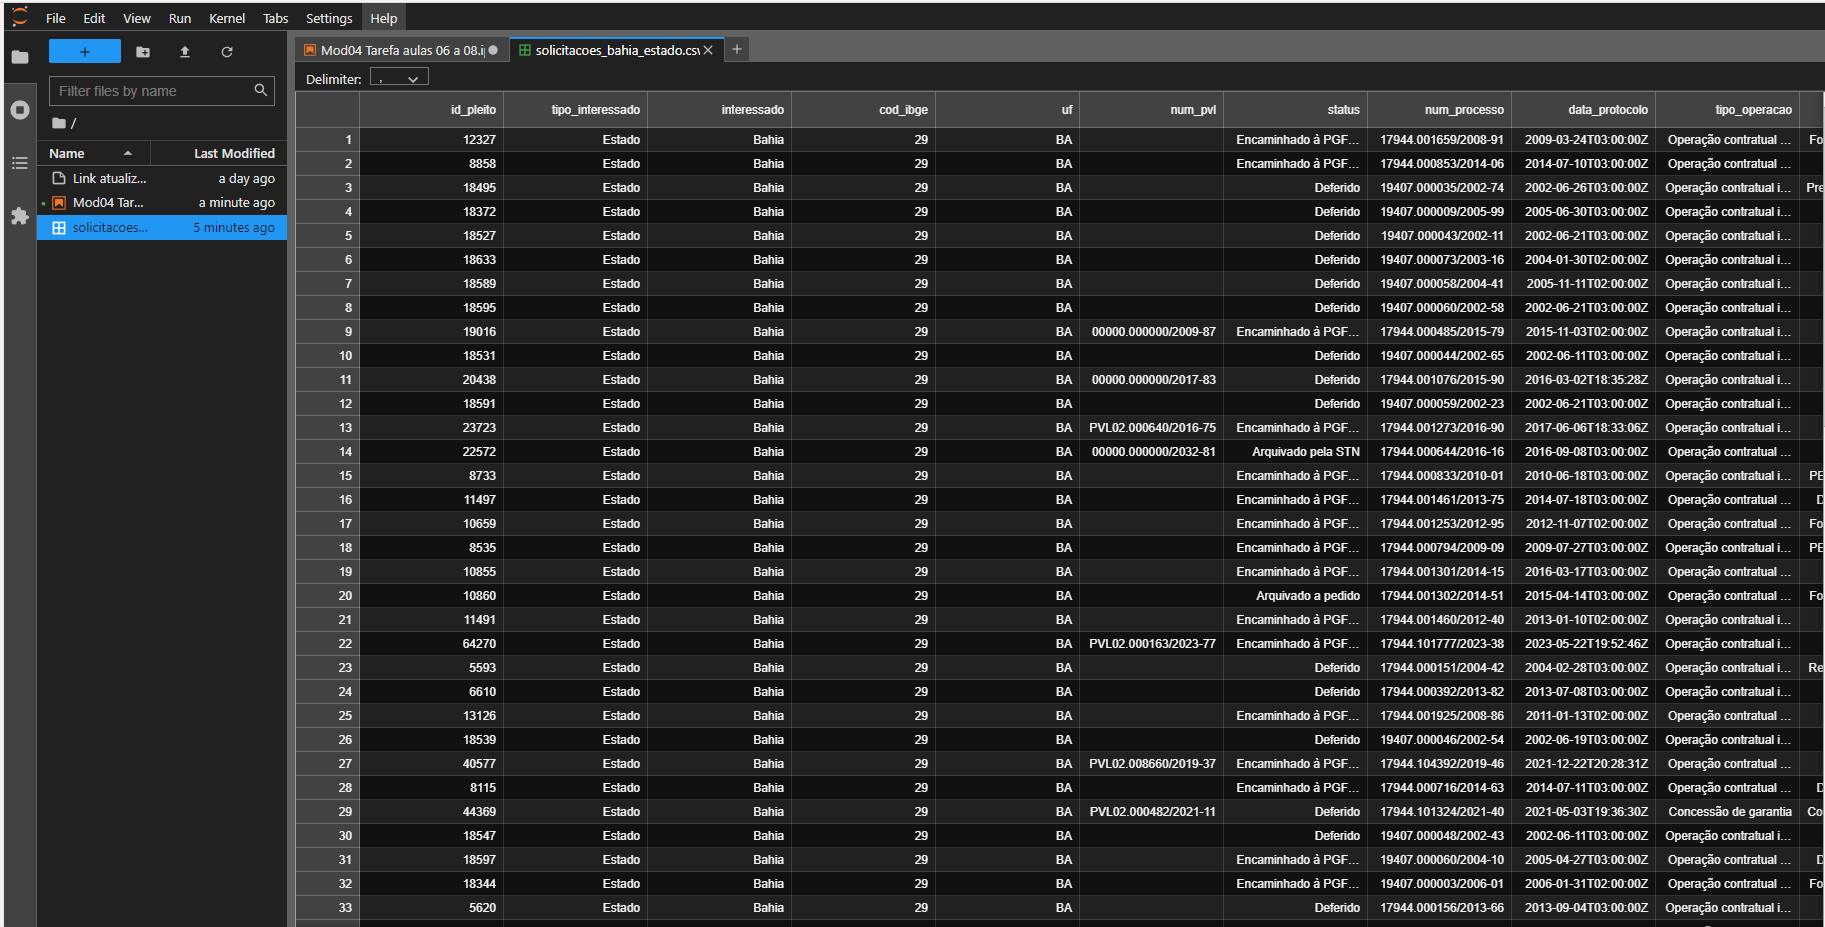

In [20]:
# Imagem do arquivo salvo.

from IPython.display import Image, display

caminho_imagem = 'teste.png'
largura, altura = 800, 600

display(Image(filename=caminho_imagem, width=largura, height=altura))
